Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Rea Rustagi"
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 4:  Interpolation and applications

## Question 1

Consider data at three points $(x_0, y_0) = (0, 0)$, $(x_1, y_1) = (1, 2)$, and $(x_2, y_2) = (2, 2)$.

**(a)** Analytically find coefficients of the interpolating  polynomial $P_2(x)$ that passes through these three points in the following bases
1. Monomial: $P(x) = p_0 + p_1 x + p_2 x^2$
1. Lagrange: $P(x) = \sum^2_{k=0} y_k \ell_k(x)$
1. Newton: $P(x) = \sum^2_{k=0} a_k n_k(x)$ 

and show that, independent of basis it's always the same polynomial.

**Note:** we didn't discuss the Newton polynomial basis in class but they are 
 are defined by
\begin{align}
    n_0 &= 1\\
    n_j(x) &= \prod^{j-1}_{i=0} (x - x_i)\quad\mathrm{for}\quad j>0 \\
\end{align}

you will only need the first three
\begin{align}
    n_0(x) &= 1\\
    n_1(x) &= (x-x_0) \\
    n_2(x) &= (x - x_0)(x-x_1)\\
\end{align}



1. Monomial:

We have 3 equations:

$$\mathcal{P}(0) = p_0 + p_1*0 + p_2*0^2 = 0$$

$$\mathcal{P}(1) = p_0 + p_1*1 + p_2*1^2 = 2$$

$$\mathcal{P}(2) = p_0 + p_1*2 + p_2*2^2 = 2$$

We rewrite as a *Vandermonde* matrix:

$$
V = \begin{bmatrix} 
     1 & 0 & 0 \\
     1 & 1 & 1 \\
     1 & 2 & 4 \\
\end{bmatrix}
$$

We can now write the system of linear equations as $V \mathbf{p} = \mathbf{y}$:

$$
V = \begin{bmatrix} 
     1 & 0 & 0 \\
     1 & 1 & 1 \\
     1 & 2 & 4 \\
\end{bmatrix} \begin{bmatrix} p_0 \\ p_1 \\ p_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 2 \\ 2 \end{bmatrix}$$

Solving, we get:

$$\begin{bmatrix} p_0 \\ p_1 \\ p_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 3 \\ -1 \end{bmatrix}$$

Therefore, we get $$\mathcal{P}(x) = 3x - x^2$$

2. Lagrange:

The Lagrange polynomial is given by:

$$
\mathcal{P}(x) = \ell_0(x) \cdot y_0 + \ell_1(x) \cdot y_1 + \ell_2(x) \cdot y_2
$$

Where: 

$$\ell_0(x) = \frac{(x - 1)(x - 2)}{(0 - 1)(0 - 2)} = \frac{x^2 - 3x + 2}{2},$$


$$\ell_1(x) = \frac{(x - 0)(x - 2)}{(1 - 0)(1 - 2)} = \frac{x^2 - 2x}{-1}$$

and 

$$\ell_2(x) = \frac{(x - 0)(x - 1)}{(2 - 0)(2 - 1)} = \frac{x^2 - x}{2}.$$

Therefore, the Lagrange polynomial is:

$$
\mathcal{P}(x) = \frac{x^2 - 3x + 2}{2} \cdot 0 + \frac{x^2 - 2x}{-1} \cdot 2 + \frac{x^2 - x}{2} \cdot 2
$$

Simplifying:

$$
\mathcal{P}(x) = 3x - x^2
$$

3. Newton:

The Newton polynomial is given by:

$$
\mathcal{P}(x) = y_0 + y_{10} \cdot (x - x_0) + y_{210} \cdot (x - x_0)(x - x_1)
$$

Where: 

$$y_{10} = \frac{y_1 - y_0}{x_1 - x_0} = \frac{2 - 0}{1 - 0} = 2,$$


$$y_{21} = \frac{y_2 - y_1}{x_2 - x_1} = \frac{2 - 2}{2 - 1} = 0$$

and 

$$y_{210} = \frac{y_{21} - y_{10}}{x_2 - x_0} = \frac{0 - 2}{2 - 0} = -1.$$

Therefore, the Newton polynomial is:

$$
\mathcal{P}(x) = 0 + 2 \cdot (x - 0) + -1 \cdot (x - 0)(x - 1)
$$

Simplifying:

$$
\mathcal{P}(x) = 3x - x^2
$$

Clearly, we get the same polynomial, $\mathcal{P}(x) = 3x - x^2$, despite using different bases.

**(b)** Use the uniqueness of the interpolating polynomial to show that for general $N+1$ points that for a function $f(x) = c$ with $c \in \mathbb R$ that

$$\sum^N_{i=0} \ell_i(x) = 1$$

holds for any value of $x$.


Let us write $\mathcal{P}(x)$ as the Lagrange interpolating polynomial:

$$P(x) = \sum^N_{k=0} y_k \ell_k(x)$$

Coefficients in the Lagrange basis are defined as:

$$
\ell_i(x) = \prod^{N}_{j=0, j \neq i} \frac{x - x_j}{x_i - x_j},
$$

where:

$$
    \ell_i(x_j) = \delta_{ij} = \left\{\begin{matrix}
            0 & i\neq j \\ 
            1 & i=j\\
            \end{matrix}\right.
$$

This property shows us that all $\ell_i(x)$ where $x  = x_i$ and 0 everywhere where $i\neq j$. Thus, the sum of all $\ell_i(x)$ must be 1. In this specific case, since $f(x)$ is a constant function, we can write $P(x)$ as:

$$P(x) = \sum^N_{k=0} y_k \ell_k(x) = y_k \sum^N_{k=0} \ell_k(x) = c \sum^N_{k=0} \ell_k(x) = c$$

## Question 2: Fun with Chebyshev Polynomials

**(a)** The $n$th Chebyshev polynomial is characterized (up to a constant) by the identity

$$T_n(\cos \theta) = \cos (n \theta)$$

Use this identity to show that the Chebyshev polynomials are orthogonal on $x\in[-1,1]$ with respect to the weight

$$\omega(x) = \frac{1}{\sqrt{1 - x^2}}$$

To do this you must prove that

$$\int^1_{-1} \omega(x) T_n(x) T_m(x) dx = \left \{ \begin{aligned} 
a & ~ & m = n \\ 
0 & ~ & m \neq n 
\end{aligned} \right .$$

where $a$ is a finite constant (also find this coefficient).  Note that you may have multiple non-zero coefficients $a$.  Make sure to cover all these cases and list the conditions that you will find these values.

In this problem we have three cases: where (i) $ m \neq n \neq 0,$ (ii) $m=n,$ and (iii) $m=n=0$
$\newline$ For all cases, we will define:
$$
\mathcal{L}[T_n(x), T_m(x)] = \int^1_{-1} \omega(x) T_n(x) T_m(x) dx
$$

Case (i):

$\newline$ We must prove that $$\mathcal{L}= \int^1_{-1} \frac{1}{\sqrt{1 - x^2}} T_n(x) T_m(x) dx$$

Using a substitution where $dx = -sin(\theta)d\theta$ and $x=cos(\theta)$:

$$
\mathcal{L}[T_n(x), T_m(x)] = \int^\pi_{0} \frac{1}{\sqrt{1 - cos^2(\theta)}} T_n(cos(\theta)) T_m(cos(\theta)) sin(\theta)d\theta = 
\int^\pi_{0} T_n(cos(\theta)) T_m(cos(\theta)) d\theta
$$

Using the identity given in the problem, we find:
$$
\mathcal{L}[T_n(x), T_m(x)] = \int^\pi_{0} cos(n\theta) cos(m\theta)) d\theta$$

We will use the trig identity:
$$ cos(n\theta)cos(m\theta)=\frac{1}{2}[cos(m+n)+cos(m-n)]$$

Integrating, we get:

$$\mathcal{L} = \frac{1}{2}(\left[\frac{sin((m+n)\theta)}{(m+n)}\right]_0^\pi + \left[\frac{sin((m-n)\theta)}{(m-n)}\right]_0^\pi)$$

We know that $sin((m\pm n)\theta) = 0$.

$\newline$ Therefore, for case (i), $$ \mathcal{L} = \frac{1}{2} * 0 = 0 $$

Case (ii):

$$\mathcal{L}[T_n(x), T_m(x)] = \int^\pi_{0} cos^2(n\theta)d\theta$$

Using the previous trig identity:

$$
= \frac{1}{2}(\left[\frac{sin(2n\theta)}{2n}\right]_0^\pi + \left[\theta \right]_0^\pi) = \frac{\pi}{2}
$$

Case (iii):
$$
\mathcal{L}[T_n(x), T_m(x)] = \pi
$$
Since we proved that $\mathcal{L}$ was 0 for all $m \neq n$, we have proved orthogonality.

**(b)** Consider the  Gaussian 
$$ f(x) = e^{-x^2} $$ on the interval $x\in[-3,3]$

make a plot comparing the polynomial interpolant through $N=9$ points using 
* Evenly spaced points
* The appropriate Chebyshev nodes (i.e. roots of $T_9$)

Be sure to show both the interpolation points and a reasonably resolved interpolating polynomial $P_8(x)$, and label all lines and axes.

You can use any of the routines from the notes or `numpy.polyfit` and `numpy.polyval`.  
For fun, experiment with other functions (e.g. Runge's function $f(x) = 1/(1 + 25x^2)$)

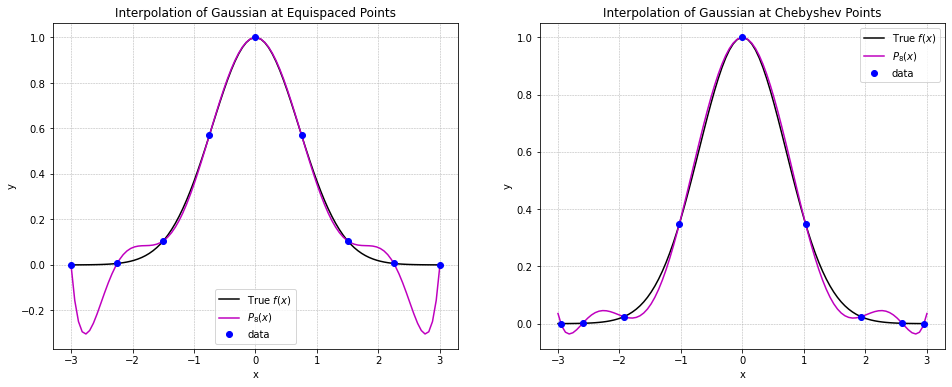

In [21]:
# Gaussian Function
def f(x):
    return numpy.exp(-(x**2))

# Parameters
x = numpy.linspace(-3, 3, 100)
num_points = 9

# ============================================================
#  Equidistant nodes
equidistant_data = numpy.empty((num_points, 2))
equidistant_data[:, 0] = numpy.linspace(-3, 3, num_points)
equidistant_data[:, 1] = f(equidistant_data[:, 0])
N = equidistant_data.shape[0] - 1

P_lagrange = poly_interpolant(x, equidistant_data)

# ============================================================
#  Chebyshev nodes
chebyshev_data = numpy.empty((num_points, 2))
chebyshev_data[:, 0] = 3 * numpy.cos((2.0 * numpy.arange(1, num_points + 1) - 1.0) * numpy.pi / (2.0 * num_points))
chebyshev_data[:, 1] = f(chebyshev_data[:, 0])

P_cheby1 = poly_interpolant(x, chebyshev_data)
    
# Fit directly with Chebyshev polynomials
coeff = numpy.polynomial.chebyshev.chebfit(chebyshev_data[:, 0], chebyshev_data[:, 1], N)
P_cheby2 = numpy.polynomial.chebyshev.chebval(x, coeff)

# ============================================================
# Plot the results
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=.5)

axes = fig.add_subplot(1, 2, 1)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(x, P_lagrange, 'm', label="$P_%s(x)$" % N)
axes.plot(equidistant_data[:, 0], equidistant_data[:, 1], 'bo', label="data")
axes.set_title("Interpolation of Gaussian at Equispaced Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=8)
axes.grid(linestyle='--', linewidth='0.5')


axes = fig.add_subplot(1, 2, 2)
axes.plot(x, f(x), 'k', label="True $f(x)$")
axes.plot(x, P_cheby1, 'm', label="$P_%s(x)$" % N)
axes.plot(chebyshev_data[:, 0], chebyshev_data[:, 1], 'bo', label="data")
          
axes.set_title("Interpolation of Gaussian at Chebyshev Points")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.legend(loc=1)
axes.grid(linestyle='--', linewidth='0.5')

plt.show()

**(c)** define the relative error as
        
$$
 r = \frac{||f(x) - P_N(x)||}{||f(x)||}
$$

where $||\cdot||$ is an appropriate norm (length) of a vector, in python you can calculate this by

```python
x = numpy.linspace(x_min, x_max)
P_N = numpy.polyval(p, x)

err = f(x) - P_N(x)
r = numpy.linalg.norm(err)/numpy.linalg.norm(f(x))
```

* Make a well labeled plot showing log(r) vs number of grid points $N$ for $N\in[5,30]$ 
* Comment briefly on your results. Some questions to consider are:
    *  does $P_N(x)\rightarrow f(x)$ as $N\rightarrow\infty$?
    *  Is one interpolant more accurate than the other?
    * Anything else you notice

In [ ]:
x = numpy.linspace(-3, 3)
P_N = numpy.polyval(p, x)

err = f(x) - P_N(x)
r = numpy.linalg.norm(err)/numpy.linalg.norm(f(x))

YOUR ANSWER HERE

## Question 3

We can often reformulate finite difference approximations as matrix-vector products.   

Here we will construct a matrix   $D$  such that multiplying a vector of $\mathbf{y}$ values would lead to a second order approximation of the First derivative for the given data. 

In other words, defining the two vectors   $\mathbf{x}=[x_0, x_1,\ldots,x_N]^T$ and $\mathbf{y}=[y_0, y_1,\ldots,y_N]^T$  such that

$$\mathbf{y} = f(\mathbf{x})$$

for some scalar function $f$,  find a matrix $D$ such that 

$$
f'(\mathbf{x}) \approx D\mathbf{y}
$$

**(a)** [12] Derive the forward, centered and  backward second order finite difference approximations to the first derivative using the method of your choice.

I.e. given 3 equispaced points $x_i, x_{i+1}, x_{i+2}$  calculate the consistent 2nd order, *1st derivative* operator evaluated at each point.  

* hint 1:  consider the interpolating polynomial $P_2(x)$ through those 3 points and calculate $P'_2(x)$ at each point.
* hint 2:  the method of undetermined coefficients on Taylor's series can be useful here as well

**Extra Credit**: Find the consistent 2nd order *2nd derivative* evaluated at each point

Let $ h = \Delta x$ and $f'(x_i) = \frac{a_1f(x_i)+a_2f(x_{i+1})+a_3f(x_{i+2})}{h}$
$\newline$ The Taylor Series expansions of $f(x_{i+1})$ and $f(x_{i+2})$ in terms of $f(x_i)$ are:
$$
f(x_{i+1}) = f(x_i) + f'(x_i)h + \frac{f''(x_i)}{2!}h^2 + \frac{f'''(x_i)}{3!}h^3 + \mathcal{O}(h^4)
\newline f(x_{i+2}) = f(x_i) + 2f'(x_i)h + 2f''(x_i)h^2 + \frac{4}{3}f'''(x_i)h^3 + \mathcal{O}(h^4)
$$

Substitute into $f'(x_i)$ (I):
$$
f'(x_i) = \frac{a_1f(x_i)+a_2f(x_{i+1})+a_3f(x_{i+2})}{h} = (\frac{a_1 + a_2 + a_3}{h})f(x_i) + (a_2+2a_3)f'(x_i) + (\frac{a_2}{2}+2a_3)hf''(x_i) + (\frac{a_2}{6}+\frac{4a_3}{3})h^2f'''(x_i) + \mathcal{O}(h^2)
$$

Matching coefficients:

$$\frac{a_1 + a_2 + a_3}{h} = 0
\newline a_2+2a_3 = 1
\newline (\frac{a_2}{2}+2a_3)h = 0
$$

Solving for $a_1, a_2, a_3$, we get:
$$ a_1 = -\frac{3}{2}, a_2 = 2, a_3 = -\frac{1}{2} $$

Therefore, by plugging these values into the equation (I) for forward difference is (II):
$$
f'(x_i) = \frac{-3f(x_i)+4f(x_{i+1})-f(x_{i+2})}{2h}
$$
The backward difference can similarly be found as (III):
$$
f'(x_i) = \frac{3f(x_i) - 4f(x_{i+1}) + f(x_{i+2})}{2h}
$$

Subtract (III) from (II) to find the central difference:
$$
f'(x_i) = \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$


**(b)** [4] Now consider an equispaced set of points  $y_i = f(x_i)$.  Can you describe the structure of a consistent 2nd order, first derivative matrix $D$,  such that 

$$
    f'(\mathbf{x}) \approx D\mathbf{y}
$$

returns the consistent 1st derivative at every point (including the end points)

The first row will reflect the forward difference equation found in (a) because there are no points to the left of the graph and the last row will reflect the backward difference because there are no included points to the right of the point of derivation. The middle rows will reflect the central difference equation to ensure that the derivative is calculated only for each individual point:

$$
\frac{1}{2h} 
\left[\begin{array}{ccccccc}
-3 & 4 & -1 & 0 & 0 & \cdots & 0\\
-1 & 0 & 1 & 0 & 0 & \cdots & 0\\
0 & -1 & 0 & 1 & 0 & \cdots & 0\\
0 & 0 & -1 & 0 & 1 & \cdots & 0\\
\vdots & & & & & \ddots & \vdots\\
0 & \cdots & 0 & 0 & 1 & -4 & 3\\
\end{array}\right]
$$


**(c)** [4] Using the function `fdcoeffV.py` described in class (and included with this homework), write a python function that takes in a numpy array of coordinates $x$ (not necessarily evenly spaced)  and returns a matrix $D$ that calculates the consistent 2nd-order 1st derivatives at each point using 3 nearest neighbors (be careful at the edges)

Given this matrix $D$, it is easy to test it for various functions and meshes

In [ ]:
from  fdcoeffV import fdcoeffV

def D1(x):
    """
    Write a good doc-string
    
    x: ndarray of coordinates
    D: ndarray
        Matrix (2-D ndarray ) to calculate consistent 2nd order first derivative
    """
    # YOUR CODE HERE
    raise NotImplementedError()
    


In [ ]:
# Let's test this using f(x) = sin(pi*x) on a uniform mesh
N = 200
x = numpy.linspace(-1, 1, N)
dx = x[1]-x[0]

pi = numpy.pi
y = lambda x: numpy.sin(pi*x)
y_prime = lambda x: pi*numpy.cos(pi*x)

print("Uniform mesh: ",end='')
numpy.testing.assert_allclose(numpy.dot(D1(x), y(x)), y_prime(x), rtol=1e-2)
print("Success!")

# test on a randomized mesh
x_rand = x + dx/3.*numpy.random.rand(N)
print("Random mesh: ",end ='')
numpy.testing.assert_allclose(numpy.dot(D1(x_rand), y(x_rand)), y_prime(x_rand), rtol=1e-2)
print("Success!")



**(d)** [6] make a beautiful convergence plot showing how the relative error in your finite element approximation

$$ r = \frac{||f'(\mathbf{x}) - D\mathbf{y}||}{||f'(\mathbf{x})||}$$

 scales with mesh spacing $\Delta x$ for $f(x) = \sin(\pi x)$ on the interval $x\in[-1,1]$.  What is the expected rate of convergence?  Compare with the best fit straight line (in log space) to your error estimates.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

**(e)** [4] Suppose we knew the *first derivative* of a function $f(x)$ at a discrete set of points and wanted to solve for the discrete function itself.  i.e.  ideally given $D$ and vector $\mathbf{y} = f'(\mathbf{x})$,  we would like to be able to solve the linear algebra problem

$$
    D\mathbf{f} = \mathbf{y}
$$

for $\mathbf{f}\approx f(\bf{x})$.  Discuss any issues we might have with this approach.

$D$ is not invertible (non-trivial kernel) which means that we cannot multiply both sides by $D^{-1}$ to find $\mathbf{f}$. Unless we are given more information to determine whether there is a unique solution for $D\mathbf{f} = \mathbf{y}$, we may not assume that $D$ is invertible. 

**(f)** **Extra Credit:**  Write a more general function (and a set of tests) to return a matrix approximating the consistent $n$th order  $k$th derivative $D_k(x,k,n)$
